# Tester: Nonlinear Langevin
## Double-welled overdamped Langevin (DWOL)

### Simple double well $V(x) = 1/4(x^2-1)^2$

Here we take for out potential the function $$V(x) = 1/4(x^2-1)^2$$ and so the (overdamped, stochastic) Langenvin equation is $$dX_t = -V'(X_t)dt + \sigma dW_t = -X_t(X_t^2-1) + \sigma dW_t$$
We solve this numerically in various ways to get an approximate solution if to the equation. For instance we will often use Euler-Maruyama which soluction takes the form 
$$Y_{n+1} = Y_{n} + \Delta t\big(-Y_n(Y_n^2-1)\big) + \sigma \sqrt{\Delta t}v_n$$
where $Y_n \approx X_{\Delta t n}$ and $v_n \sim N(0,1)$ for all $n = 0,1,2,\dots$ are i.i.d.

The goal here is to reproduce the statisical and dynamical information (?). Of a realization of $Y = (Y_n;\;n=o,1,2,\dots)$ using a reduced model. We will compare the autocavariances as well as the pdf the $Y_n$. 

So, first we run the full model. To do this I use the function `DataGen_DWOL` found in th file `DataGen.jl` found in the current folder (`Examples\Nonlinear Langevin`).

In [14]:
using PyPlot
using Random
using JLD

# Get software to generate model
include("../Nonlinear Langevin/DataGen.jl")

# Get model reduction software being tested
include("../../Tools/Model_Reduction_Dev.jl")

# Get tester tools
include("testertools.jl")

causal_test (generic function with 1 method)

In [3]:
# Model run Parameters
steps = 10^7 + 1
scheme = "FE"
t_start = 0
t_stop = 10^5
discard = 100000
sig_init = [1.5]
sigma = [.5]
V_prime = x -> -x.*(x.^2 .- 1)
SM1 = false
Obs_noise = false
d = 1
# e = randn(d,steps + discard)

dt = (t_stop - t_start)/(steps - 1)

# Get full model run
Random.seed!(2014)
X = DataGen_DWOL(
    steps;
    scheme, t_start, t_stop, discard, 
    sig_init , sigma, V_prime,
    SM1, Obs_noise, d
    )

0.01

In [5]:
data = Dict("steps" => steps,
            "t_start" => t_start,
            "sigma" => sigma,
            "X" => X)
save("data_10_23_2020.jld",data)

In [3]:
data = load("data_10_23_2020.jld")
X = data["X"]

1×10000001 Array{Float64,2}:
 1.21912  1.2862  1.30297  1.2873  …  1.17377  1.23803  1.20563  1.23796

In [3]:
X = data["X"]

1×10000001 Array{Float64,2}:
 1.21912  1.2862  1.30297  1.2873  …  1.17377  1.23803  1.20563  1.23796

In [7]:
# Put in Psi functions
Psi(x) = [x; x.^3]

# Model reduction Parameters
M_out = 100
n = 3
p = 500
par = 55
ty = "bin"
xspec_est = "DM"
rl = false
Preds = true
PI = false
rtol = 1e-6

nfft = 2^16

@time h_pack_dm = get_wf(X, Psi;
    M_out, n, p, par, ty, nfft, rl, xspec_est, Preds, PI, rtol);

h_wf_dm                              = h_pack_dm[1][1]

Number of CKMS iterations: 229
errK errR : 5.839641943559125e-11 1.73936162363499e-14
 21.809082 seconds (32.93 M allocations: 14.269 GiB, 3.51% gc time)


1×2×100 Array{Complex{Float64},3}:
[:, :, 1] =
 1.00976-4.95592e-14im  -0.00979518+1.44078e-14im

[:, :, 2] =
 -0.000758073-2.20458e-14im  0.000299071+4.74799e-15im

[:, :, 3] =
 0.00112176+2.06553e-13im  -0.000601638-5.60773e-14im

...

[:, :, 98] =
 1.67209e-6+5.02669e-15im  -4.14287e-7-1.44563e-15im

[:, :, 99] =
 7.50158e-7+5.16087e-16im  -1.87947e-7+9.51382e-17im

[:, :, 100] =
 -6.57134e-7+8.43406e-16im  1.58132e-7-5.14632e-16im

In [8]:
# Put in Psi functions
Psi(x) = [x; x.^3]

# Model reduction Parameters
M_out = 100
n = 3
p = 500
par = 10000
ty = "bin"
xspec_est = "DM"
rl = false
Preds = true
PI = false
rtol = 1e-6

nfft = 2^16

@time h_pack_dm = get_wf(X, Psi;
    M_out, n, p, par, ty, nfft, rl, xspec_est, Preds, PI, rtol);

h_wf_dm                              = h_pack_dm[1][1]

Number of CKMS iterations: 6801
errK errR : 7.188946215522792e-11 4.083057819080977e-14
 35.064081 seconds (34.47 M allocations: 57.835 GiB, 8.41% gc time)


1×2×100 Array{Complex{Float64},3}:
[:, :, 1] =
 1.00971-8.32691e-14im  -0.00979209+2.29756e-14im

[:, :, 2] =
 -0.000778425+1.61559e-14im  0.000310248-6.04257e-15im

[:, :, 3] =
 0.00129579+2.09104e-13im  -0.000654304-5.54495e-14im

...

[:, :, 98] =
 0.000301709-9.27331e-15im  0.000165411+3.08636e-15im

[:, :, 99] =
 -0.00063169-4.54885e-14im  4.09588e-5+1.4902e-14im

[:, :, 100] =
 0.000651138+5.53275e-14im  -0.000223626-1.58308e-14im

In [9]:
# Put in Psi functions
Psi(x) = [x; x.^3]

# Model reduction Parameters
n = 3
p = 500
ty = "bin"

xspec_est = "SP"

nfft = 0

@time h_pack_sp = get_wf(X, Psi;
    M_out, n, p, par, ty, nfft, rl, xspec_est, Preds, PI, rtol);

h_wf_sp                              = h_pack_sp[1][1][1,:,1]

Number of CKMS iterations: 6801
errK errR : 7.188946215522792e-11 4.083057819080977e-14
 65.408014 seconds (594.02 M allocations: 87.954 GiB, 14.37% gc time)


2-element Array{Complex{Float64},1}:
     1.011961892599728 + 1.0892204142475181e-14im
 -0.010454590603533783 - 2.959389125586005e-15im

In [10]:
h_wf_dm                              = h_pack_dm[1][1]
z_spect_pred_minus_num_fft_dm        = h_pack_dm[1][4]
z_spect_pred_plus_num_fft_dm         = h_pack_dm[1][5]
S_sigpred_overS_plus_fft_num_dm      = h_pack_dm[1][6]
S_sigpred_overS_plus_plus_num_fft_dm = h_pack_dm[1][7]
H_num_dm                             = h_pack_dm[1][8];

h_wf_sp                              = h_pack_sp[1][1]
z_spect_pred_minus_num_fft_sp        = h_pack_sp[1][4]
z_spect_pred_plus_num_fft_sp         = h_pack_sp[1][5]
S_sigpred_overS_plus_fft_num_sp      = h_pack_sp[1][6]
S_sigpred_overS_plus_plus_num_fft_sp = h_pack_sp[1][7]
H_num_sp                             = h_pack_sp[1][8];

nfft_sp = size(H_num_sp,3)
nfft_dm = size(H_num_dm,3)
T_sp = 2π*(0:nfft_sp-1)/nfft_sp
T_dm = 2π*(0:nfft_dm-1)/nfft_dm

0.0:9.587379924285257e-5:6.2830894333803435

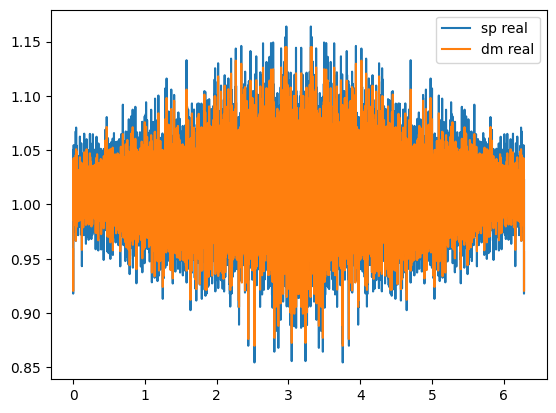

PyObject <matplotlib.legend.Legend object at 0x7f100d653ee0>

In [11]:
plot(T_sp[1:100:end],real(H_num_sp[1,1,1:100:end]'),label = "sp real")
plot(T_dm,real(H_num_dm[1,1,:]'),label = "dm real")
legend()

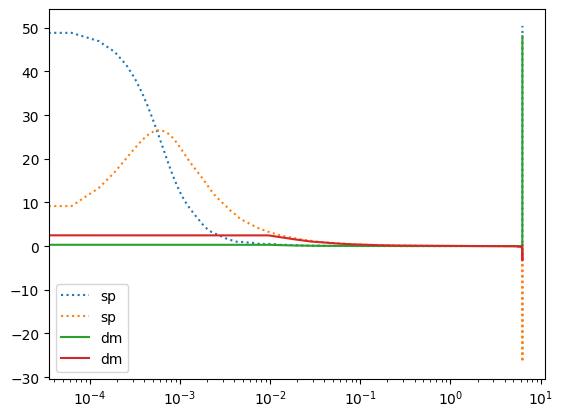

PyObject <matplotlib.legend.Legend object at 0x7f100d5c2d90>

In [12]:
semilogx(T_sp[1:100:end],
    reverse([real(S_sigpred_overS_plus_plus_num_fft_sp[1,1,
                1:100:end]) imag(S_sigpred_overS_plus_plus_num_fft_sp[1,1,
                    1:100:end])],dims = 1),
    ":",
    label = "sp")
semilogx(T_dm[1:100:end],
    reverse([real(S_sigpred_overS_plus_plus_num_fft_dm[1,1,
                1:100:end]) imag(S_sigpred_overS_plus_plus_num_fft_dm[1,1,
                    1:100:end])],dims = 1),
    label = "dm")
legend()

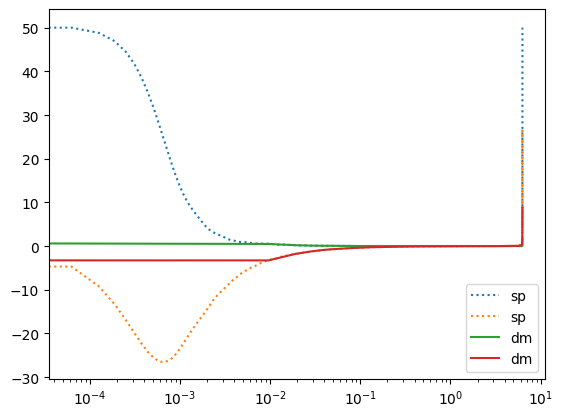

PyObject <matplotlib.legend.Legend object at 0x7f100d6c4850>

In [13]:
semilogx(T_sp[1:100:end],
    [real(S_sigpred_overS_plus_plus_num_fft_sp[1,1,
                1:100:end]) imag(S_sigpred_overS_plus_plus_num_fft_sp[1,1,
                    1:100:end])],
    ":",
    label = "sp")
semilogx(T_dm[1:100:end],
    [real(S_sigpred_overS_plus_plus_num_fft_dm[1,1,
                1:100:end]) imag(S_sigpred_overS_plus_plus_num_fft_dm[1,1,
                    1:100:end])],
    label = "dm")
legend()

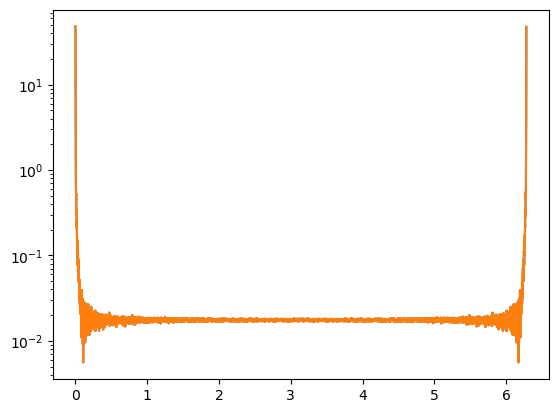

C:\Users\jared\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\jared\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000007FF62D08>

In [26]:
semilogy(T_dm,z_spect_pred_minus_num_fft_dm[1,1,:])
semilogy(T_sp[1:100:end],z_spect_pred_minus_num_fft_sp[1,1,1:100:end])

### Shifted Double Well


$V(x) = 1/4((x-2)^2 - 1)$

In [131]:
V_prime = x -> -(x.^3 - 6x.^2 + 11 .*x .- 6)

V_prime([1 2 3])

1×3 Array{Int64,2}:
 0  0  0

In [133]:
# Model run Parameters
steps = 10^7 + 1
scheme = "FE"
t_start = 0
t_stop = 10^5
discard = 100000
sig_init = [1.5]
sigma = [.5]
SM1 = false
Obs_noise = false
d = 1
# e = randn(d,steps + discard)

dt = (t_stop - t_start)/(steps - 1)

# Get full model run
Random.seed!(2016)
X = DataGen_DWOL(
    steps;
    scheme, t_start, t_stop, discard, 
    sig_init , sigma, V_prime,
    SM1, Obs_noise, d
    )

1×10000001 Array{Float64,2}:
 3.09368  2.99808  3.01524  3.01428  …  1.36308  1.3479  1.31585  1.33509

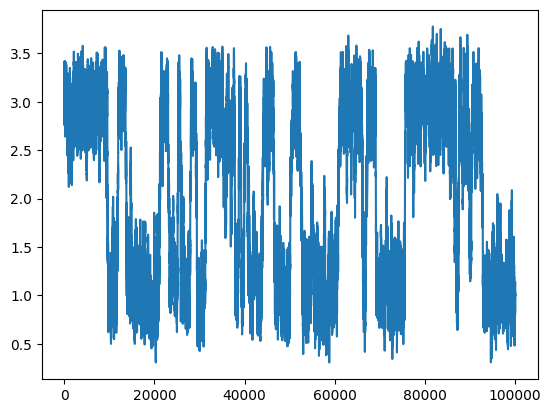

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0ffbb6e310>

In [134]:
plot(X[1,1:100000])

In [135]:
m = mean(X[:])

X_c = X .- m

1×10000001 Array{Float64,2}:
 1.10815  1.01255  1.02971  1.02875  …  -0.637629  -0.669677  -0.650443

In [136]:
# Put in Psi functions
Psi(x) = [x; x.^3]

# Model reduction Parameters
M_out = 100
n = 3
p = 500
par = 55
ty = "bin"
xspec_est = "DM"
rl = false
Preds = true
PI = false
rtol = 1e-6

nfft = 2^16

@time h_pack_dm = get_wf(X_c, Psi;
    M_out, n, p, par, ty, nfft, rl, xspec_est, Preds, PI, rtol);

h_wf_dm = h_pack_dm[1][1]

Number of CKMS iterations: 229
errK errR : 5.5279726740205317e-11 1.582181997461342e-14
 23.749867 seconds (32.92 M allocations: 14.268 GiB, 11.75% gc time)


1×2×100 Array{Complex{Float64},3}:
[:, :, 1] =
 1.01007-3.67386e-14im  -0.0100435+8.60588e-15im

[:, :, 2] =
 -0.00117868+1.04276e-14im  0.000304016-2.64513e-15im

[:, :, 3] =
 0.000972014+9.05534e-14im  -0.000220177-2.19606e-14im

...

[:, :, 98] =
 -1.79223e-7+5.5676e-15im  4.4356e-8-1.93059e-15im

[:, :, 99] =
 -4.80192e-7+6.17177e-15im  1.18287e-7-1.25796e-15im

[:, :, 100] =
 -8.7183e-7-1.2526e-14im  2.13738e-7+3.06757e-15im

### Uneven Double well

$V(x) = \frac{1}{10}x(x+1)(x-4)^2$

$V'(x) = \frac{1}{10}(4x^3 - 21x^2 + 16x + 16)$

The left well is a little low then the right.

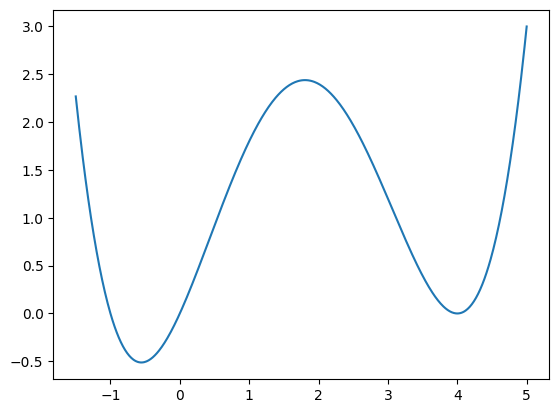

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0ffbb3bfa0>

In [137]:
V       = x ->  1/10*x*(x+1)*(x-4)^2
V_prime = x -> -(4x.^3 - 21x.^2 + 16x .+ 16)/10

xx = -1.5:0.01:5
plot(xx,V.(xx))

In [ ]:
# Model run Parameters
steps = 10^7 + 1
scheme = "FE"
t_start = 0
t_stop = 10^5
discard = 100000
sig_init = [1.5]
sigma = [2]
SM1 = false
Obs_noise = false
d = 1
# e = randn(d,steps + discard)

dt = (t_stop - t_start)/(steps - 1)

# Get full model run
Random.seed!(2018)
X = DataGen_DWOL(
    steps;
    scheme, t_start, t_stop, discard, 
    sig_init , sigma, V_prime,
    SM1, Obs_noise, d
    )

In [183]:
### This is how we set up the signals and 
### predictors They have to me off set so 
### that pred is one index behind signal
### i.e. pre(n) = psi(sig(n-1))
X_sig = X[:,2:end];

Psi(x) = [x; x.^2; x.^3]
X_pred = get_pred(X,Psi) # Notice it is just 
                         # X get_pred assigns
                         # psi straight across

3×10000001 Array{Float64,2}:
  3.53097   3.76596   3.54371   3.79429  …  -0.66387   -0.672487  -0.575031
 12.4677   14.1825   12.5579   14.3966       0.440724   0.452239   0.33066
 44.0231   53.4107   44.5017   54.6249      -0.292583  -0.304125  -0.19014

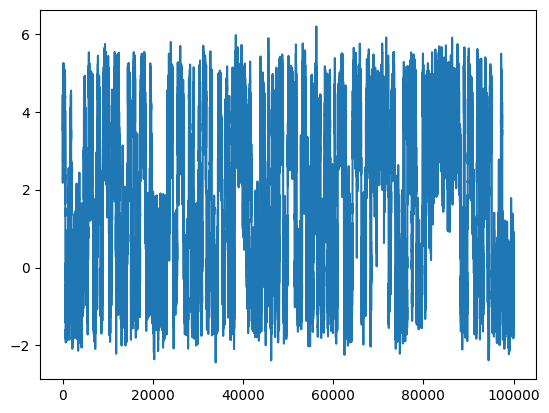

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0ffba26550>

In [145]:
plot(X[1,1:100000])

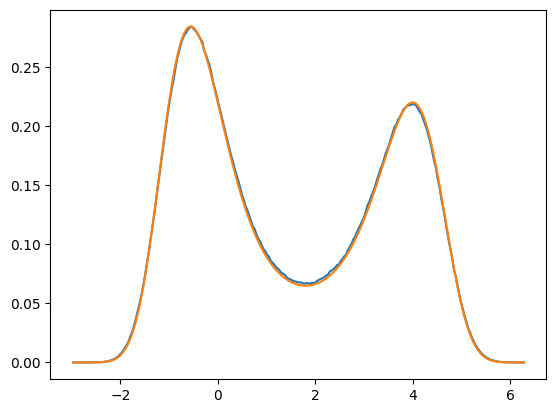

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0ffb9f9ac0>

In [146]:
σ = sigma[1]
O = emp_pdf(X[1,:])
p_ana(x) = exp(-V(x)*2/σ^2)
α = maximum(O[1])/p_ana(-0.554)
plot(O[2],p_ana.(O[2])*α)

In [147]:
m = mean(X[:])

1.5086913695581312

In [150]:
# ## Redone model with centered wells
# V_c       = x -> V(x .+ m)
# V_c_prime = x -> V_prime(x .+ m)

# # rerun centered model to check
# Random.seed!(2014)
# X_c = DataGen_DWOL(
#     steps;
#     scheme, t_start, t_stop, discard, 
#     sig_init , sigma, V_prime = V_c_prime,
#     SM1, Obs_noise, d
#     )

# m_c = mean(X_c[:])

X_c = X .- m

1×10000001 Array{Float64,2}:
 2.02228  2.25727  2.03502  2.2856  2.28677  …  -2.17256  -2.18118  -2.08372

In [148]:
# Put in Psi functions
Psi(x) = [x; x.^2; x.^3]

# Model reduction Parameters
M_out = 100
n = 3
p = 500
par = 55
ty = "bin"
xspec_est = "DM"
rl = false
Preds = true
PI = false
rtol = 1e-6

nfft = 2^16

@time h_pack_dm = get_wf(X_c, Psi;
    M_out, n, p, par, ty, nfft, rl, xspec_est, Preds, PI, rtol);

h_wf_dm = h_pack_dm[1][1]


Number of CKMS iterations: 225
errK errR : 9.615384420103676e-11 1.0856980754687654e-13
 45.174612 seconds (42.96 M allocations: 26.486 GiB, 10.13% gc time)


1×3×100 Array{Complex{Float64},3}:
[:, :, 1] =
 1.01998-2.30032e-15im  0.00282119-1.43236e-16im  -0.00400158+4.88416e-17im

[:, :, 2] =
 0.000392244-1.12865e-14im  …  -4.061e-6+4.05303e-16im

[:, :, 3] =
 -0.000405075+2.35301e-14im  …  5.70645e-6-7.63882e-16im

...

[:, :, 98] =
 1.00543e-9-2.07103e-16im  …  -1.15003e-10+1.11914e-17im

[:, :, 99] =
 1.5639e-7+1.2417e-15im  4.7929e-9+2.41395e-17im  -6.89812e-9-4.75528e-17im

[:, :, 100] =
 1.29151e-7+1.07446e-15im  …  -6.08368e-9-7.12963e-17im

Analytic solution:

In [153]:
h_ana = [1-dt*(6m^2/5-21m/5+8/5) -dt*(6m/5-21/10) -dt*2/5]

1×3 Array{Float64,2}:
 1.02005  0.0028957  -0.004

## Analyze Wiener Filter

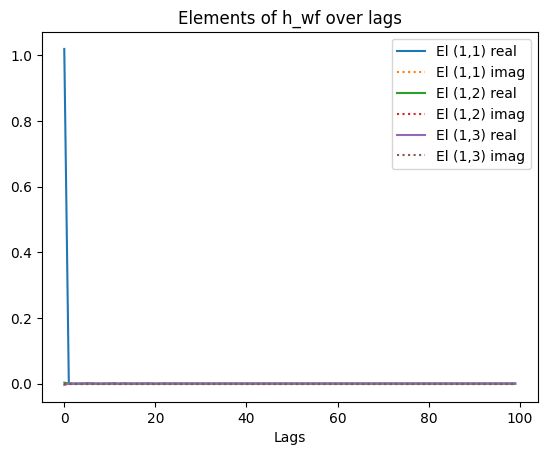

PyObject Text(0.5, 1.0, 'Elements of h_wf over lags')

In [180]:
plot_WF(h_wf_dm, rl = false)

## Analyze One step prediction error

In [184]:
X_hat = one_step_pred(X_sig, h_wf_dm, X_pred)

1×10000000 Array{Complex{Float64},2}:
 3.76596+0.0im  3.54371+0.0im  3.79429+0.0im  …  -0.683722+1.28521e-14im

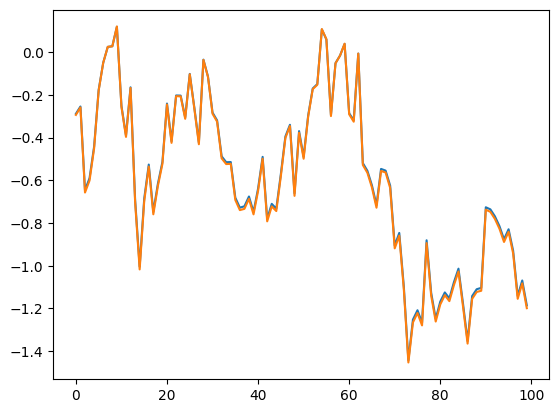

2-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0fec5bcf40>
 PyObject <matplotlib.lines.Line2D object at 0x7f0fec5bcd00>

In [185]:
wind = (1:100) .+ 2400
plot([X_sig[1,wind] X_hat[1,wind.+1]])

In [186]:
X_err = X_sig - X_hat

1×10000000 Array{Complex{Float64},2}:
 0.0-0.0im  0.0-0.0im  0.0-0.0im  0.0-0.0im  …  0.108691-1.28521e-14im

In [187]:
lags = -100:100
C1 = my_crosscov(pred[1,:],X_err[:],lags);
C2 = my_crosscov(pred[2,:],X_err[:],lags);
C3 = my_crosscov(pred[3,:],X_err[:],lags);

plot(dt*lags,[C1 C2 C3])

LoadError: MethodError: no method matching getindex(::Complex{Float64}, ::Int64, ::Colon)
Closest candidates are:
  getindex(::Number, ::Integer) at number.jl:76
  getindex(::Number, !Matched::Integer...) at number.jl:81
  getindex(::Number) at number.jl:75
  ...

## Analyze Reduced Model Run

In [14]:
X_rm = redmodrun(X, h_wf, Psi)


reduced model blewup at step 4559


1×10000001 Array{Complex{Float64},2}:
 1.18133+0.0im  1.36549+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im

# Trick (model mismatch)

In [167]:
X = X_c

# Put in Psi functions
Psi_cos(x) = [x; cos.(x)]
@time h_wf_cos = get_wf(X, Psi_cos;
    M_out, n, p, par, ty, nfft, rl, Preds, PI, rtol)[1][1];

Number of CKMS iterations: 167
errK errR : 9.374791703148277e-11 9.052200030231146e-14
 23.196322 seconds (32.91 M allocations: 14.266 GiB, 11.43% gc time)


1×2×100 Array{Complex{Float64},3}:
[:, :, 1] =
 0.989245-1.85632e-15im  -0.0101365+7.07163e-16im

[:, :, 2] =
 0.00154945-6.20814e-15im  -0.00013316+1.78408e-15im

[:, :, 3] =
 0.000612567+1.41808e-14im  0.000278727-4.43735e-15im

...

[:, :, 98] =
 -2.98505e-6-5.64863e-17im  8.45145e-7+4.4804e-17im

[:, :, 99] =
 -2.18541e-6+6.35293e-16im  5.78953e-7-2.15619e-16im

[:, :, 100] =
 -1.42716e-6+1.48029e-16im  3.32284e-7-1.25605e-17im

In [172]:
Psi_sin(x) = [x; sin.(x)]
@time h_wf_sin = get_wf(X, Psi_sin;
    M_out, n, p, par, ty, nfft, rl, Preds, PI, rtol)[1][1];

Number of CKMS iterations: 159
errK errR : 9.977222842615301e-11 2.5189595213953026e-14
 23.210674 seconds (32.91 M allocations: 14.265 GiB, 11.46% gc time)


In [173]:
Psi_exp(x) = [x; exp.(x); exp.(-x)]
@time h_wf_exp = get_wf(X, Psi_exp;
    M_out, n, p, par, ty, nfft, rl, Preds, PI, rtol)[1][1];

Number of CKMS iterations: 210
errK errR : 9.744573901668015e-11 1.6730529367867726e-13
 45.587101 seconds (52.95 M allocations: 27.304 GiB, 10.67% gc time)


In [174]:
Psi_expi(x) = [x; exp.(im*x); exp.(-im*x)]
@time h_wf_expi = get_wf(X, Psi_expi;
    M_out, n, p, par, ty, nfft, rl = false, Preds, PI, rtol)[1][1];

Number of CKMS iterations: 182
errK errR : 5.837730128788762e-11 1.0405275456430533e-13
 46.263202 seconds (62.97 M allocations: 28.347 GiB, 10.88% gc time)


In [175]:
fun(x) = h_ana*Psi(x)
fun_c(x) = h_wf_dm[:,:,1]*Psi(x)
fun_cos(x) = h_wf_cos[:,:,1]*Psi_cos(x)
fun_sin(x) = h_wf_sin[:,:,1]*Psi_sin(x)
fun_exp(x) = h_wf_exp[:,:,1]*Psi_exp(x)
fun_expi(x) = h_wf_expi[:,:,1]*Psi_expi(x)

fun_expi (generic function with 1 method)

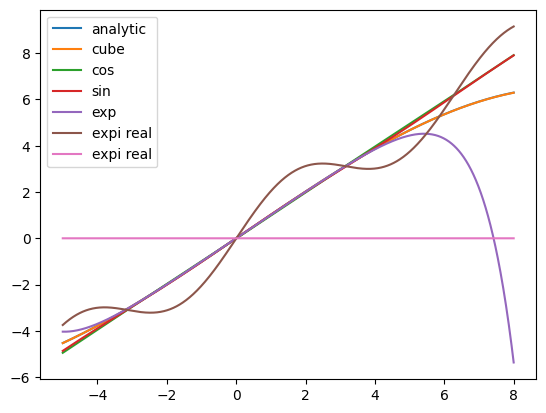

Complex{Float64}[1.0199817374096134 - 2.300318492012779e-15im 0.0028211853709352924 - 1.4323634483548052e-16im -0.004001577635141214 + 4.884157163083283e-17im]
Complex{Float64}[0.9892448244947976 - 1.8563182513148013e-15im -0.010136530534427698 + 7.071634704916073e-16im]
Complex{Float64}[0.9823560537278369 - 3.147395249240195e-15im 0.04785540037245814 - 7.042633989685814e-15im]
Complex{Float64}[1.0234639982392686 - 2.5866525121309214e-15im -0.004547171486070593 + 1.8039823040286878e-17im 0.007291893679160745 - 2.370495809513496e-16im]
Complex{Float64}[0.9892164118508555 + 1.6568046469941589e-15im -0.005074121437332694 - 0.6266933845334496im -0.005074121437334045 + 0.626693384533451im]


PyObject <matplotlib.legend.Legend object at 0x7f0ffb841c40>

In [179]:
xx = -5:0.01:8
plot(xx,fun.(xx),label = "analytic")
plot(xx,fun_c.(xx),label = "cube")
plot(xx,fun_cos.(xx),label = "cos")
plot(xx,fun_sin.(xx),label = "sin")
plot(xx,fun_exp.(xx),label = "exp")
plot(xx,real(fun_expi.(xx)),label = "expi real")
plot(xx,imag(fun_expi.(xx)),label = "expi real")
println(h_wf_dm[:,:,1])
println(h_wf_cos[:,:,1])
println(h_wf_sin[:,:,1])
println(h_wf_exp[:,:,1])
println(h_wf_expi[:,:,1])
legend()

In [160]:


plot(xx,fun_sin.(xx),label = "sin")
plot(xx,fun_exp.(xx),label = "exp")
plot(xx,real(fun_expi.(xx)),label = "expi real")
plot(xx,imag(fun_expi.(xx)),label = "expi real")
println(h_wf[:,:,1])
println(h_wf_cos[:,:,1])
println(h_wf_sin[:,:,1])
println(h_wf_exp[:,:,1])
println(h_wf_expi[:,:,1])
legend()

LoadError: DimensionMismatch("matrix A has dimensions (8,1), vector B has length 2")